In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import interpolate
from scipy import fftpack as scfft
import analysis
import analysis2

In [2]:
#path = "/media/ke/8tb_part2/FSL_work/test_SH/SH_026_20170501_edits.txt"
path = "/media/ke/8tb_part2/FSL_work/test_SH/SH_030_20170505_edits.txt"
#path = "/media/ke/8tb_part2/FSL_work/test_SH/SH_036_20170417_edits.txt"

#txt_files = [file for file in os.listdir(path) if file.endswith('.txt')]
# print(txt_files)
#path = "../Austin_data/Austin_endtidal/BOLD_CO2_only_edit.txt"
# path = '/home/asophonsri/Dropbox/HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt'
print(path)

/media/ke/8tb_part2/FSL_work/test_SH/SH_030_20170505_edits.txt


/media/ke/8tb_part2/FSL_work/test_SH/SH_030_20170505_edits.txt
       Time       O2      CO2
0  0.000000  16.0522  29.4016
1  0.000533  16.0828  29.8143
2  0.001067  16.0828  30.6933
3  0.001600  16.0522  31.5213
4  0.002133  16.1133  32.2955


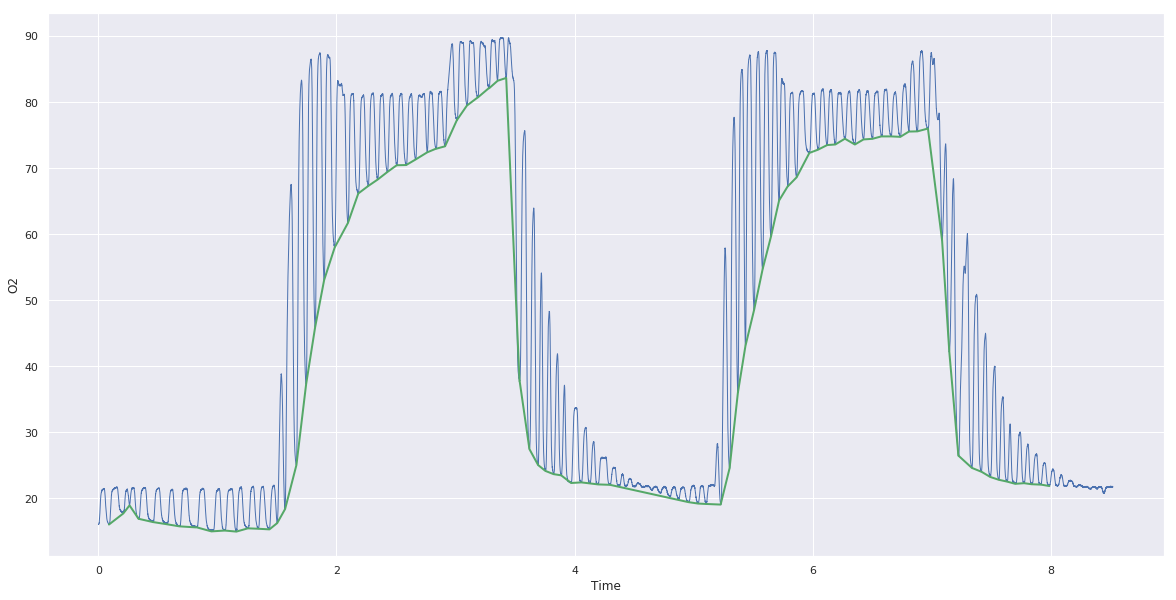

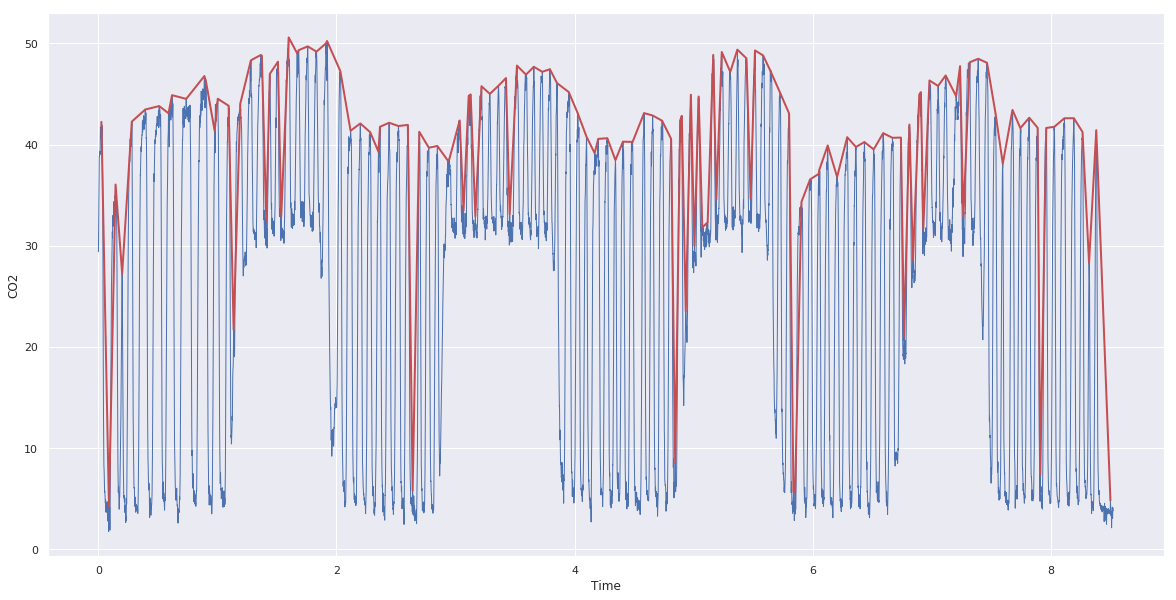

         Time       O2       CO2
166  0.088533  16.0522   4.18882
392  0.209067  17.7307   8.47484
490  0.261333  18.9514  38.76640
633  0.337600  16.9067   9.05129
640  0.341333  16.9067  15.67020
         Time       O2       CO2
47   0.025067  21.0266  42.23860
166  0.088533  16.0522   4.18882
270  0.144000  21.5454  36.04690
374  0.199467  17.8528  27.25560
526  0.280533  21.5149  42.26680


In [3]:
sns.set(rc={'figure.figsize':(20,10)})

# for file in txt_files:
#     f_path = path+file
if path:
    f_path = path
    df = pd.read_csv(f_path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
    print(f_path)
    
    print(df.head())
#    print(df.CO2.apply(lambda x:x*-1).head())
#    print(df.CO2.head())
    
#    sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
    low_O2, _ = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
    sns.lineplot(x='Time', y='O2', data=df, linewidth=1, color='b')
#    print(low_O2)
#    print()
#    print(index)
    sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2], linewidth=2, color='g')
    plt.show()

#    sns.scatterplot(x='Time', y='CO2', data=df, linewidth=0, s=10)
    sns.lineplot(x='Time', y='CO2', data=df, linewidth=1, color='b')
    high_CO2, _ = signal.find_peaks(df.CO2, prominence=2)
#    print(high_CO2)
#    print()
#    print(index)
    sns.lineplot(x='Time', y='CO2', data=df.iloc[high_CO2], linewidth=2, color='r')
    plt.show()
    
#    print(len(low_O2))
#    print(len(high_CO2))
    
#    print(df.iloc[low_O2].head())
#    print(df.iloc[low_O2].O2.head())
#    print(df.iloc[high_CO2].head())
#    print(df.iloc[high_CO2].CO2.head())
    
    O2_df = df.iloc[low_O2]
    CO2_df = df.iloc[high_CO2]
    
    print(O2_df.head())
    print(CO2_df.head())
    
#    os.mkdir(path+file[:len(file)-4])
#    save_path = path+file[:len(file)-4]+'/O2_contrast.txt'
#    O2_df.to_csv(path_or_buf=save_path, sep='\t', header=False, index=False)
#    save_path = path+file[:len(file)-4]+'/CO2_contrast.txt'
#    CO2_df.to_csv(path_or_buf=save_path, sep='\t', header=False, index=False)
    
    
#    N = len(df)
#    T = 1.5 # given through json file (TR)
#    T = df.Time[1] # time between each data point
#    O2_x = np.linspace(0.0, N*T, N)
    
#    O2_xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#    O2_yf = fft(df.O2)
#    O2_w = signal.blackman(N)
#    O2_ywf = fft(df.O2 * O2_w)
    
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_yf[1:N//2]), '-b')
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_ywf[1:N//2]), '-r')
#    plt.legend(['FFT', 'FFT w. window'])
#    plt.show()
    
#     sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
#     high_O2 = signal.find_peaks(df.O2, prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[high_O2[0]], linewidth=4, color='r')
#     low_O2 = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2[0]], linewidth=4, color='g')
#     plt.show()
    
    

[0.00000000e+00 1.17319558e-01 2.34639115e-01 ... 9.37265947e+02
 9.37383266e+02 9.37500586e+02]
7992
[5.37012432e+01 2.35093633e+00 2.19453514e+00 ... 1.99628649e-03
 2.20815907e-03 1.70480743e-03]
7992


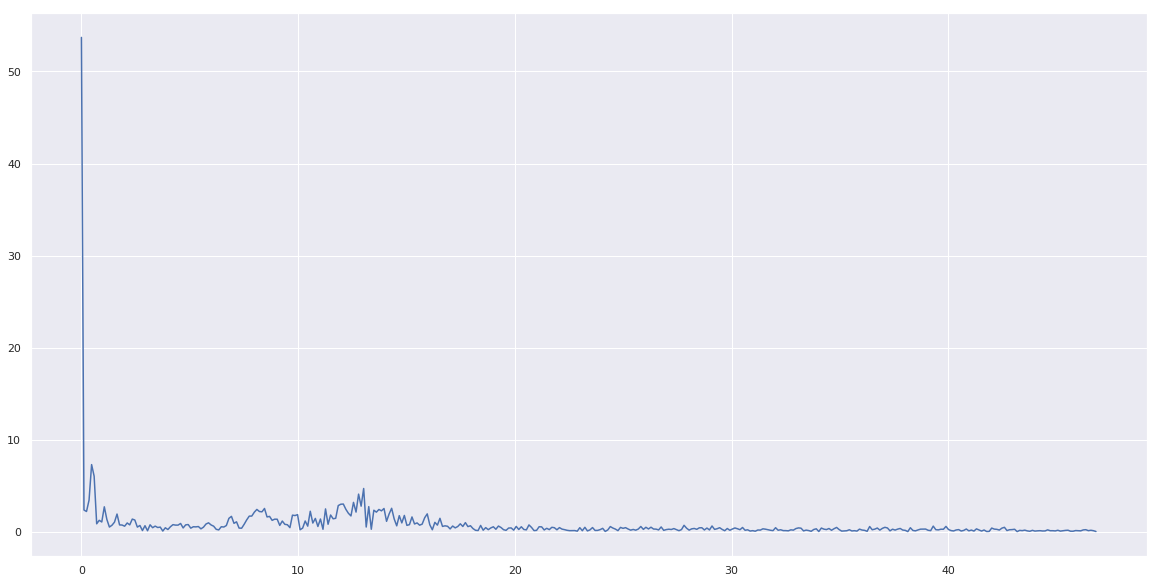

In [18]:
time_series = df.Time
data = df.CO2

N = len(data)

freq, power, disp = analysis.fft_analysis().fourier_trans(time_series[1], data)

print(freq)
print(len(freq))
print(disp)
print(len(disp))

plt.plot(freq[:400], disp[:400])
plt.show()

In [5]:
b_path = "/media/ke/8tb_part2/FSL_work/SH_info/SH036/BOLD_processed/meants.txt"

       Meants
0  554.966032
1  412.088321
2  385.578978
3  383.381007
4  382.118683
320


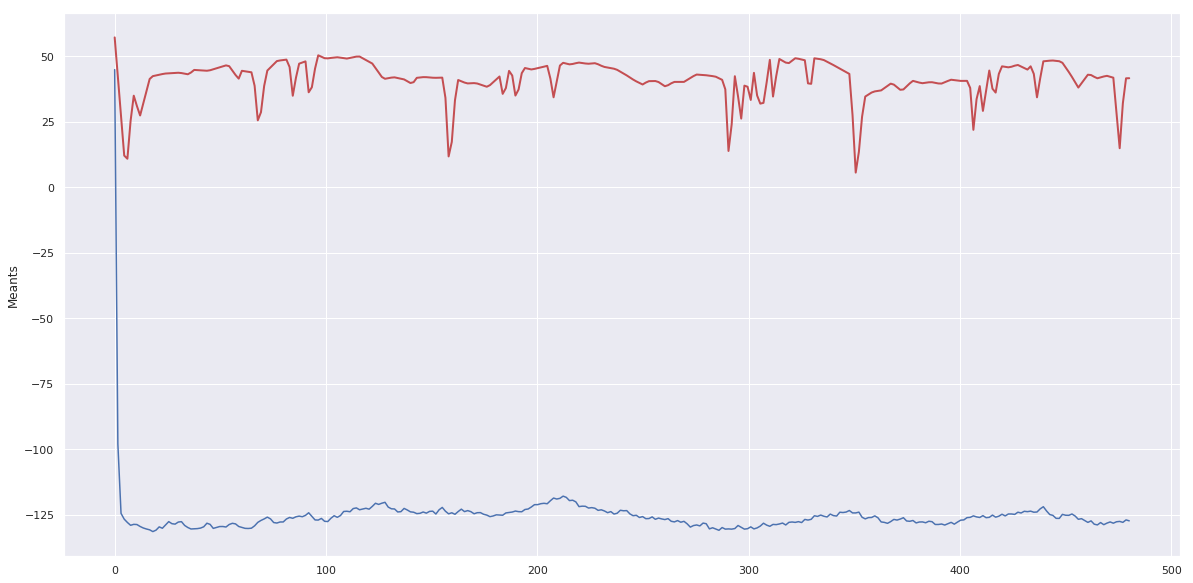

In [6]:
data_series = pd.read_csv(b_path, index_col=False, names=['Meants'])
print(data_series.head())
sns.lineplot(x=np.linspace(0,480, len(data_series)), y=data_series.Meants-510)

print(len(data_series))

CO2_fxn = interpolate.interp1d(CO2_df.Time*60, CO2_df.CO2, fill_value='extrapolate')
et_CO2 = CO2_fxn(np.linspace(0,480, len(data_series)))
sns.lineplot(x=np.linspace(0,480, len(data_series)), y=et_CO2, linewidth=2, color='r')
plt.show()

In [7]:
powCO2 = scfft.fft(et_CO2)
realCO2 = powCO2.real
compCO2 = powCO2.imag

powBOLD = scfft.fft(data_series.Meants)
realBOLD = powBOLD.real
compBOLD = powBOLD.imag

preinvCO2 = powCO2
preinvBOLD = realBOLD + 1j*compCO2

shiftedBOLD = scfft.ifft(preinvBOLD)

/home/ke/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


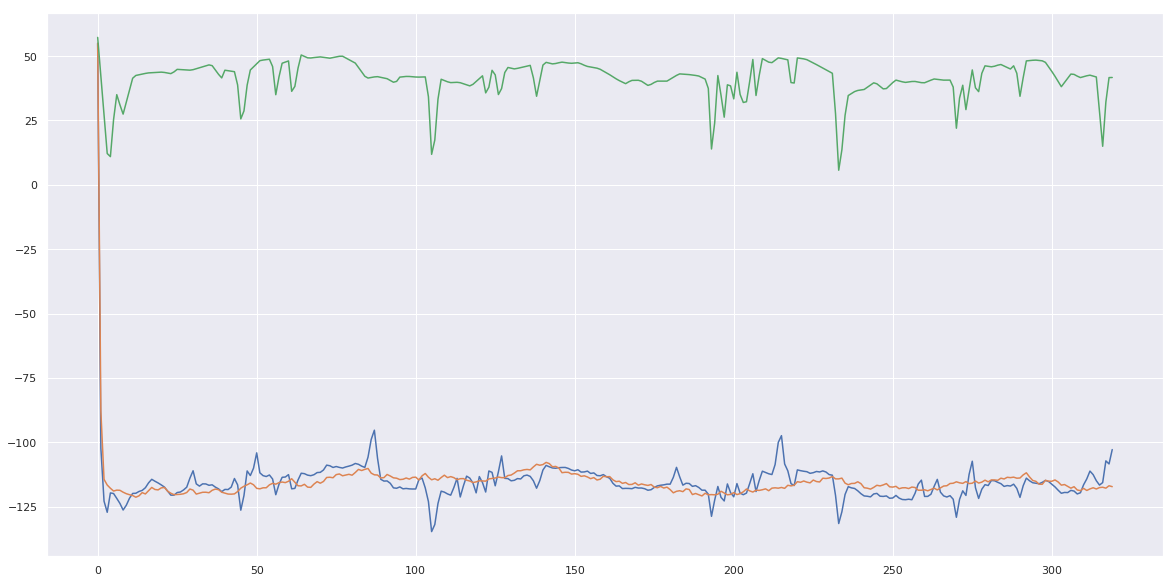

In [8]:
plt.figure(figsize=(20,10))
plt.plot(shiftedBOLD-500)
plt.plot(data_series.Meants-500)
# recreate the plot because plt.show clears plt
plt.plot(et_CO2)


In [9]:
print(df.Time.max())

8.52427


In [10]:
endTidal = pd.read_csv(path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
#drop rows with missing cols
endTidal = endTidal.dropna()

endTidal.CO2 = signal.savgol_filter(endTidal.CO2, 35, 3)

pre_O2 = analysis.fft_analysis().fourier_filter(endTidal.Time, endTidal.O2, 3, 35, 1.5)
pre_CO2 = analysis.fft_analysis().fourier_filter(endTidal.Time, endTidal.CO2, 3, 35, 1.5)

print(len(pre_O2))

meants = data_series.Meants

print(len(meants))

processed_O2 = analysis.shifter().corr_align(meants[3:], pre_O2[3:])
processed_CO2 = analysis.shifter().corr_align(meants[3:], pre_CO2[3:])

320
320


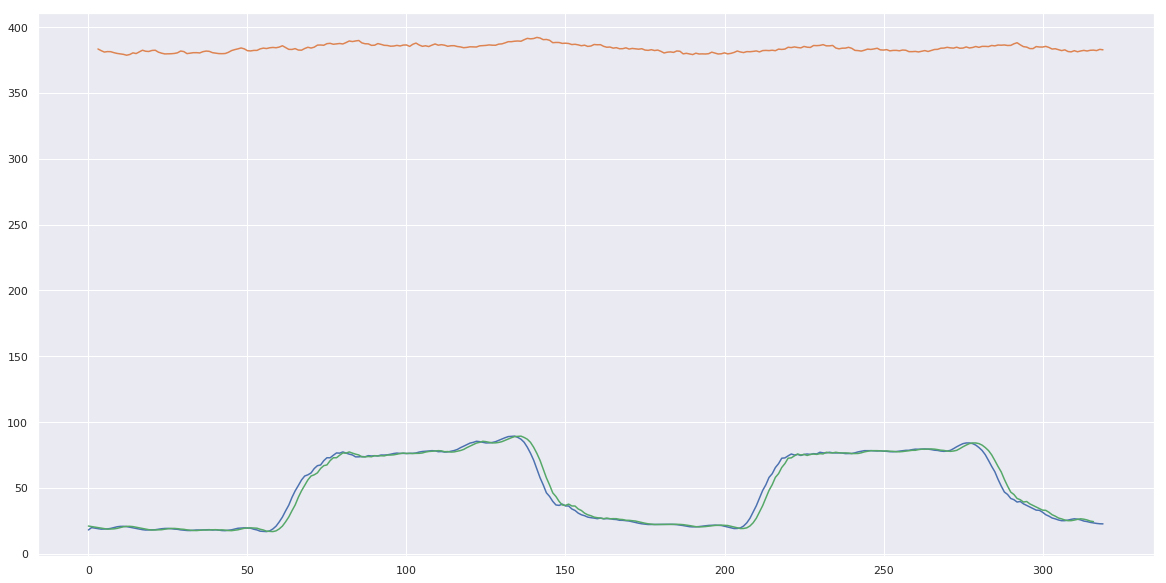

In [11]:
sns.lineplot(data=pre_O2)
sns.lineplot(data=meants[3:])
sns.lineplot(data=processed_O2)

In [12]:
endTidal = pd.read_csv(path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
#drop rows with missing cols
endTidal = endTidal.dropna()

endTidal.CO2 = signal.savgol_filter(endTidal.CO2, 35, 3)

pre_O2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.O2, 3, 35, 1.5)
pre_CO2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.CO2, 3, 35, 1.5)

print(len(pre_O2))

meants = data_series.Meants

print(len(meants))

processed_O2 = analysis2.shifter().corr_align(meants[3:], pre_O2[3:])
processed_CO2 = analysis2.shifter().corr_align(meants[3:], pre_CO2[3:])

320
320


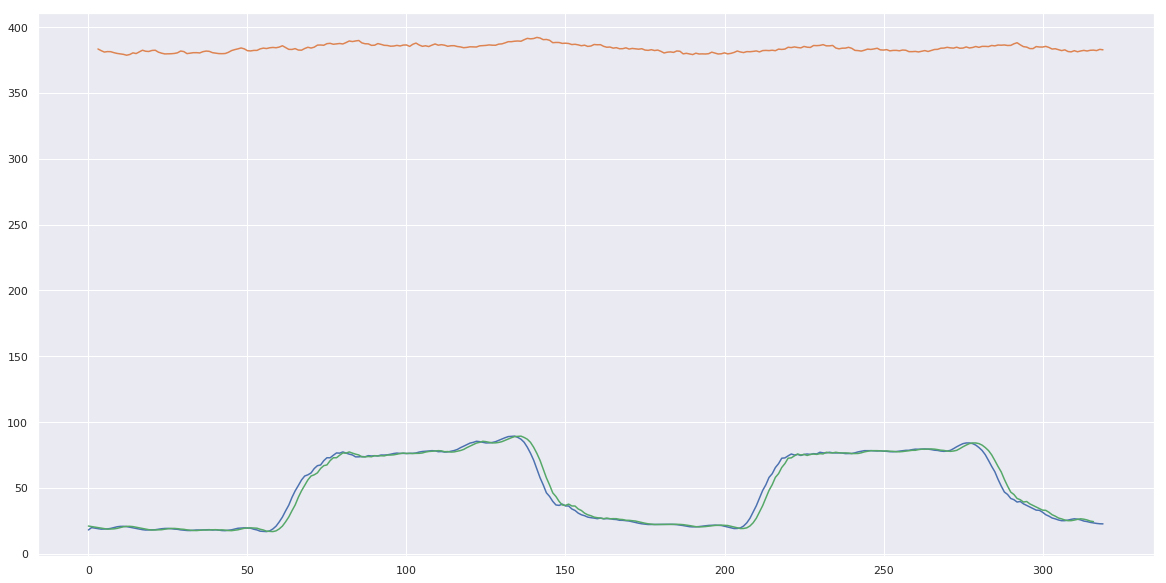

In [13]:
sns.lineplot(data=pre_O2)
sns.lineplot(data=meants[3:])
sns.lineplot(data=processed_O2)

In [29]:
endTidal = pd.read_csv(path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
#drop rows with missing cols
endTidal = endTidal.dropna()

endTidal.CO2 = signal.savgol_filter(endTidal.CO2, 35, 3)

f_O2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.O2, 3, 35, 1.5)
f_CO2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.CO2, 3, 35, 1.5)

if endTidal.Time.max() < 10:
    endTidal.Time = endTidal.Time * 60
    
print(endTidal.head())

p_O2, _ = signal.find_peaks(endTidal.O2.apply(lambda x:x*-1), prominence=2)
print(len(p_O2))
p_CO2, _ = signal.find_peaks(endTidal.CO2, prominence=3)
print(len(p_CO2))


# get the data points of peak
O2_df = endTidal.iloc[p_O2]
# print(O2_df.head())
CO2_df = endTidal.iloc[p_CO2]
# print(CO2_df.head())

O2_resamp = interpolate.interp1d(O2_df.Time, O2_df.O2, fill_value='extrapolate')
O2_final = O2_resamp(np.linspace(0, 480, 480/1.5))
print(len(O2_final))
CO2_resamp = interpolate.interp1d(CO2_df.Time, CO2_df.CO2, fill_value='extrapolate')
CO2_final = CO2_resamp(np.linspace(0, 480, 480/1.5))
print(len(CO2_final))

    Time       O2        CO2
0  0.000  16.0522  28.376219
1  0.032  16.0828  29.608774
2  0.064  16.0828  30.740172
3  0.096  16.0522  31.775124
4  0.128  16.1133  32.718342
120
104
320
320


/home/ke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/ke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


/home/ke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/ke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
No handles with labels found to put in legend.


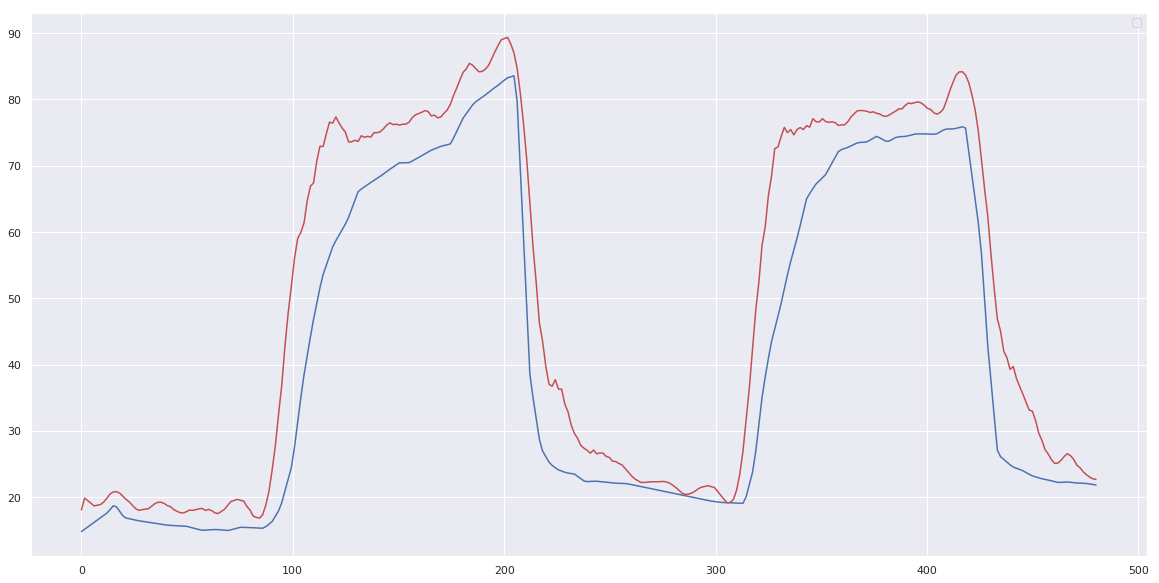

/home/ke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/ke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


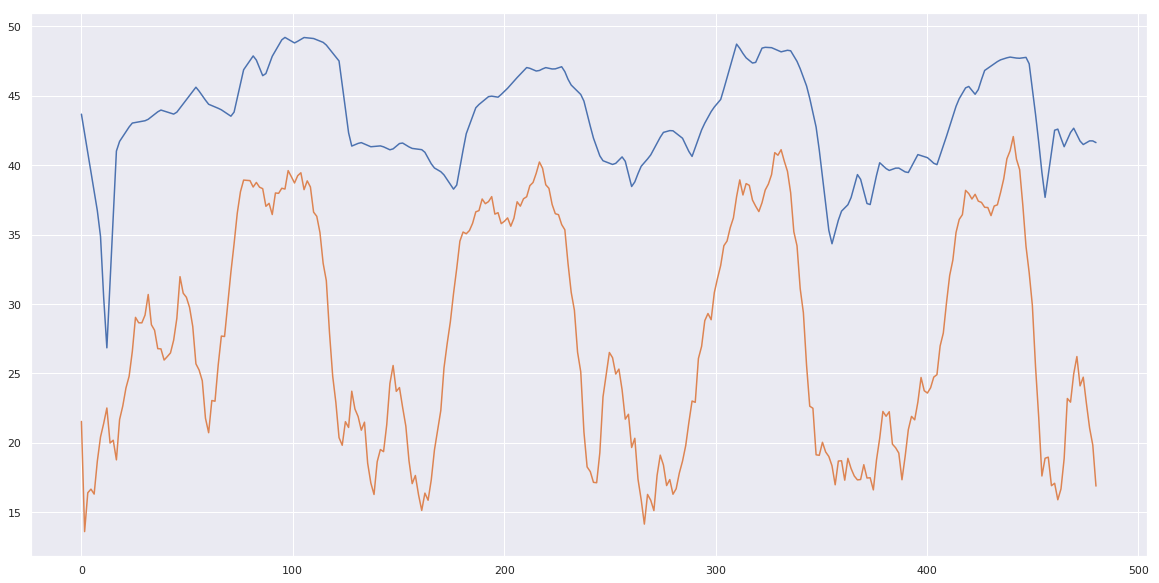

In [30]:
sns.lineplot(x=np.linspace(0, 480, 480/1.5), y=O2_final, color='b')
sns.lineplot(x=np.linspace(0, 480, 480/1.5), y=f_O2, color = 'r')
plt.legend()
plt.show()

sns.lineplot(x=np.linspace(0, 480, 480/1.5), y=CO2_final)
sns.lineplot(x=np.linspace(0, 480, 480/1.5), y=f_CO2)
plt.show()

In [31]:
O2 = O2_final
print(len(O2))

if(len(O2) < len(O2_final)):
    O2_df = O2_df.iloc[O2]
    O2_resamp = interpolate.interp1d(O2_df.Time, O2_df.O2, fill_value='extrapolate')
    O2_final = O2_resamp(np.linspace(0, 480, 480/1.5))
CO2 = CO2_final[CO2_final > f_CO2]
print(len(CO2))

320
320


    Time       O2        CO2
0  0.000  16.0522  28.376219
1  0.032  16.0828  29.608774
2  0.064  16.0828  30.740172
3  0.096  16.0522  31.775124
4  0.128  16.1133  32.718342
120
104


No handles with labels found to put in legend.


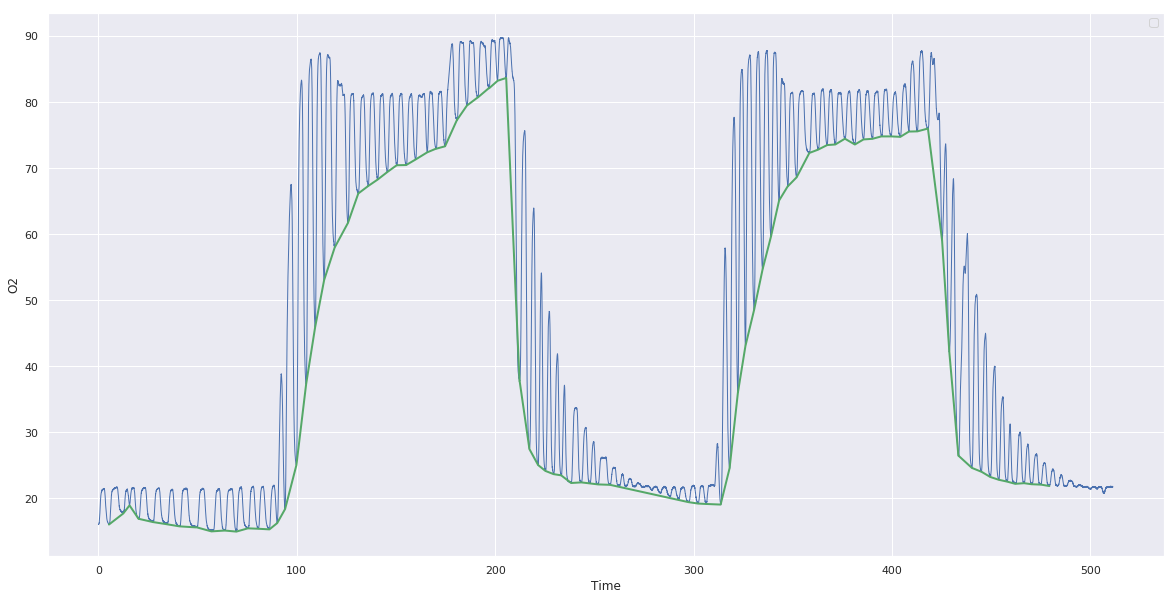

320
320


,Time,O2,CO2
0,0.000,16.0522,28.376219
1,0.032,16.0828,29.608774
2,0.064,16.0828,30.740172
3,0.096,16.0522,31.775124
4,0.128,16.1133,32.718342


In [44]:
endTidal = pd.read_csv(path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
#drop rows with missing cols
endTidal = endTidal.dropna()

endTidal.CO2 = signal.savgol_filter(endTidal.CO2, 35, 3)

f_O2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.O2, 3, 35, 1.5)
f_CO2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.CO2, 3, 35, 1.5)

if endTidal.Time.max() < 10:
    endTidal.Time = endTidal.Time * 60
    
print(endTidal.head())

p_O2, _ = signal.find_peaks(endTidal.O2.apply(lambda x:x*-1), prominence=2)
print(len(p_O2))
p_CO2, _ = signal.find_peaks(endTidal.CO2, prominence=3)
print(len(p_CO2))


# get the data points of peak
O2_df = endTidal.iloc[p_O2]
sns.lineplot(x='Time', y='O2', data=endTidal, linewidth=1, color='b')
sns.lineplot(x='Time', y='O2', data=O2_df, linewidth=2, color='g')
plt.legend()
plt.show()
    
# print(O2_df.head())
CO2_df = endTidal.iloc[p_CO2]
# print(CO2_df.head())

O2_resamp = interpolate.interp1d(O2_df.Time, O2_df.O2, fill_value='extrapolate')
O2_final = O2_resamp(np.arange(0, 480, 1.5))
print(len(O2_final))
CO2_resamp = interpolate.interp1d(CO2_df.Time, CO2_df.CO2, fill_value='extrapolate')
CO2_final = CO2_resamp(np.arange(0, 480, 1.5))
print(len(CO2_final))

endTidal.head()

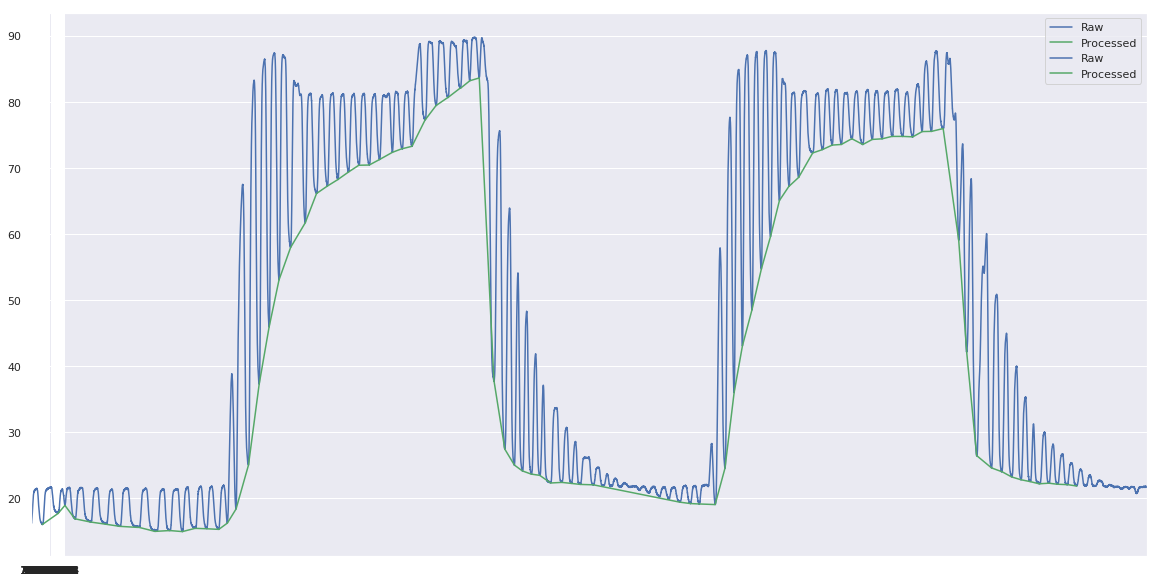

In [47]:
ax1 = endTidal.O2.plot(xticks=endTidal.Time, color='b', label='Raw')
ax2 = O2_df.O2.plot(xticks=O2_df.Time, color='g', label='Processed')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2)
plt.show()